In [ ]:
text = 'You say goodbye and I say hello.'

In [ ]:
# 전처리 
# 특수문자 제거
# 문장 시작/끝 부호 표시?
# 단어 소문자화?

In [ ]:
text = text.lower()
text = text.replace('.', ' .')

In [ ]:
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
import numpy as np

In [ ]:
# 전처리 함수화
def preprocess(text):
  # 소문자화, 끝부호 분리
  text = text.lower()
  text = text.replace('.', ' .')
  # 띄어쓰기로 분리 
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  # 1.
  corpus = np.array([word_to_id[w] for w in words]) 
  # 2. 
  corpus = []
  for w in words:
    corpus.append(word_to_id[w])
  corpus = np.array(corpus)
  return corpus, word_to_id, id_to_word 
  

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)

  # 비어있는 (모든 값이 0인) 행렬 선언
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  # corpus를 반복문으로 탐색함
  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size+1):
      left_idx = idx - i 
      right_idx = idx + i

      # 양 끝 데이터 처리 (데이터가 없는 경우)
      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1
  
  return co_matrix

In [ ]:
C = create_co_matrix(corpus, vocab_size=len(word_to_id))

In [ ]:
C[word_to_id['say']]

array([1, 0, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x**2)) + eps)  # -> x / ||x||
  ny = y / (np.sqrt(np.sum(y**2)) + eps)  # => y / ||y||

  return np.dot(nx, ny) # x*y / ||x|| ||y||

In [ ]:
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


In [ ]:
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
np.sum(C)

14

In [ ]:
np.sum(C, axis=0)

array([1, 4, 2, 2, 2, 2, 1])

In [ ]:
def ppmi(C, eps=1e-8):
  # pmi 계산을 위한 빈 행렬 정의
  M = np.zeros_like(C, dtype=np.float64)
  N = np.sum(C) # 동시 발생 행렬의 합
  S = np.sum(C, axis=0) 
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j] * N / (S[j]*S[i]) + eps)
      M[i, j] = max(0, pmi)

  return M

In [ ]:
W = ppmi(C)

In [ ]:
np.set_printoptions(precision=3)
print(W)

[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
U, S, V = np.linalg.svd(W) 

In [ ]:
print(U[0])

[ 3.409e-01  2.220e-16 -3.053e-16 -1.205e-01 -1.110e-16 -9.323e-01
 -4.384e-17]


In [ ]:
import matplotlib.pyplot as plt

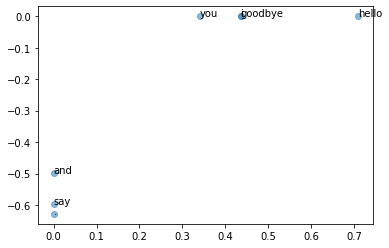

In [ ]:
for word, word_id in word_to_id.items(): 
  plt.annotate(word, (U[word_id,0], U[word_id,1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [ ]:
# coding: utf-8
import sys
import os
sys.path.append('..')
try:
    import urllib.request
except ImportError:
    raise ImportError('Use Python3!')
import pickle
import numpy as np


url_base = 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/'
key_file = {
    'train':'ptb.train.txt',
    'test':'ptb.test.txt',
    'valid':'ptb.valid.txt'
}
save_file = {
    'train':'ptb.train.npy',
    'test':'ptb.test.npy',
    'valid':'ptb.valid.npy'
}
vocab_file = 'ptb.vocab.pkl'

dataset_dir = ''


def _download(file_name):
    file_path = dataset_dir + '/' + file_name
    if os.path.exists(file_path):
        return

    print('Downloading ' + file_name + ' ... ')

    try:
        urllib.request.urlretrieve(url_base + file_name, file_path)
    except urllib.error.URLError:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        urllib.request.urlretrieve(url_base + file_name, file_path)

    print('Done')


def load_vocab():
    vocab_path = dataset_dir + '/' + vocab_file

    if os.path.exists(vocab_path):
        with open(vocab_path, 'rb') as f:
            word_to_id, id_to_word = pickle.load(f)
        return word_to_id, id_to_word

    word_to_id = {}
    id_to_word = {}
    data_type = 'train'
    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name

    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()

    for i, word in enumerate(words):
        if word not in word_to_id:
            tmp_id = len(word_to_id)
            word_to_id[word] = tmp_id
            id_to_word[tmp_id] = word

    with open(vocab_path, 'wb') as f:
        pickle.dump((word_to_id, id_to_word), f)

    return word_to_id, id_to_word


def load_data(data_type='train'):
    '''
        :param data_type: 데이터 유형: 'train' or 'test' or 'valid (val)'
        :return:
    '''
    if data_type == 'val': data_type = 'valid'
    save_path = dataset_dir + '/' + save_file[data_type]

    word_to_id, id_to_word = load_vocab()

    if os.path.exists(save_path):
        corpus = np.load(save_path)
        return corpus, word_to_id, id_to_word

    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name
    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()
    corpus = np.array([word_to_id[w] for w in words])

    np.save(save_path, corpus)
    return corpus, word_to_id, id_to_word

In [ ]:
corpus, word_to_id, id_to_word = load_data('train')

Done


In [ ]:
print('말뭉치 크기', len(corpus))

말뭉치 크기 929589


In [ ]:
corpus[:30]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
for id in corpus[:100]:
  print(id_to_word[id], end=' ')

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join the board as a nonexecutive director nov. N <eos> mr. <unk> is chairman of <unk> n.v. the dutch publishing group <eos> rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate <eos> a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of 

In [ ]:
C = create_co_matrix(corpus, vocab_size=len(word_to_id))

In [ ]:
W = ppmi(C)
U, S, V = np.linalg.svd(W) 